In [111]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt
from PIL import Image

In [112]:
df=pd.read_csv(r'C:\Users\User\OneDrive\Pictures\CSV Files\EurosAll.csv')

In [113]:
df

,Squad,Goals/90,xG,npxG,Passes Cmp,xA,KP,1/3 Passes,Prog Passes,Prog Carries,1/3 Carries
0,at Austria,1.16,1.02,1.02,439.8,0.70,8.37,32.10,37.4,49.3,17.20
1,be Belgium,1.60,1.20,1.06,524.0,0.76,7.40,33.20,29.4,54.0,14.60
2,hr Croatia,1.40,1.05,1.05,410.9,0.77,7.67,20.90,25.1,47.4,14.00
3,cz Czech Republic,1.20,1.08,0.94,335.8,0.76,7.80,20.60,27.4,36.6,11.60
4,dk Denmark,1.90,1.49,1.37,410.0,0.87,11.00,30.20,33.5,50.2,12.90
5,eng England,1.30,1.04,0.92,439.0,0.78,6.36,28.40,25.6,39.4,12.60
6,fi Finland,0.33,0.53,0.53,309.3,0.53,6.00,14.70,20.0,20.7,9.00
7,fr France,1.40,1.53,1.37,495.8,1.02,10.20,42.10,36.5,51.6,16.50
8,de Germany,1.00,1.63,1.63,586.8,1.18,8.25,56.80,46.5,67.3,20.80
9,hu Hungary,1.00,0.40,0.40,239.7,0.23,4.33,9.33,11.7,17.7,3.67


In [114]:
params = list(df.columns)
params

['Squad',
 'Goals/90',
 'xG',
 'npxG',
 'Passes Cmp',
 'xA',
 'KP',
 '1/3 Passes',
 'Prog Passes',
 'Prog  Carries',
 '1/3 Carries']

In [115]:
params = params[1:]
params

['Goals/90',
 'xG',
 'npxG',
 'Passes Cmp',
 'xA',
 'KP',
 '1/3 Passes',
 'Prog Passes',
 'Prog  Carries',
 '1/3 Carries']

In [116]:
Squad = df.loc[df['Squad']=='dk Denmark'].reset_index()
Squad = list(Squad.loc[0])
print(Squad)

[4, 'dk Denmark', 1.9, 1.49, 1.37, 410.0, 0.87, 11.0, 30.2, 33.5, 50.2, 12.9]


In [117]:

df.Squad.values

array(['at Austria', 'be Belgium', 'hr Croatia', 'cz Czech Republic',
       'dk Denmark', 'eng England', 'fi Finland', 'fr France',
       'de Germany', 'hu Hungary', 'it Italy', 'nl Netherlands',
       'mk North Macedonia', 'pl Poland', 'pt Portugal', 'ru Russia',
       'sct Scotland', 'sk Slovakia', 'es Spain', 'se Sweden',
       'ch Switzerland', 'tr Turkey', 'ua Ukraine', 'wls Wales'],
      dtype=object)

In [118]:
print(len(Squad),print(len(params)))
Squad = Squad[2:]
print(len(Squad),print(len(params)))

10
12 None
10
10 None


In [119]:
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],Squad[x])))

In [120]:

round(stats.percentileofscore(df[params[0]],player[0]))

100

In [121]:

baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="white",    # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

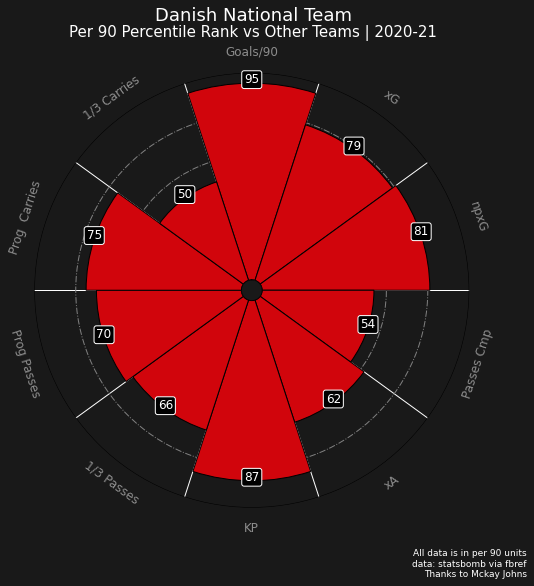

In [125]:
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#d1050c", edgecolor="black",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="white", fontsize=12,
        va="center", alpha=.5
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="white", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="white", facecolor="black",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Danish National Team", size=18,
    ha="center", color="white"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Per 90 Percentile Rank vs Other Teams | 2020-21",
    size=15,
    ha="center", color="white"
)

# add credits
notes = 'All data is in per 90 units'
CREDIT_1 = "data: statsbomb via fbref"
CREDIT_2 = "Thanks to Mckay Johns"

fig.text(
    0.99, 0.005, f"{notes}\n{CREDIT_1}\n{CREDIT_2}", size=9,
    color="white",
    ha="right"
)

fig.set_facecolor('#191919')
ax.patch.set_facecolor('#191919')